<a href="https://colab.research.google.com/github/abxda/python-stats/blob/main/STAT_Semana_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción y Motivación**

En temas anteriores, han visto cómo analizar eventos relacionados con una sola variable aleatoria. Por ejemplo, han aprendido a calcular la probabilidad de que una máquina falle en un entorno específico. Esto se hace utilizando funciones de probabilidad o densidad para una única variable aleatoria.

Sin embargo, el mundo real es mucho más complejo. La mayoría de los sistemas y fenómenos que encontrarán involucran múltiples variables que están interrelacionadas. Es aquí donde entra en juego la probabilidad multivariable.

Consideremos un ejemplo concreto: un servidor informático en un centro de datos. En este escenario, no solo nos interesa saber si el servidor fallará o no (lo que sería un problema univariable), sino que también queremos entender cómo diferentes factores pueden influir en ese fallo. Algunos de estos factores podrían ser:

1. La temperatura ambiente del centro de datos
2. La carga de usuarios en el servidor
3. La edad del hardware
4. El tipo de tareas que se están ejecutando

Cada uno de estos factores puede considerarse como una variable aleatoria, y todos juntos forman un sistema multivariable. La probabilidad multivariable nos proporciona las herramientas para modelar y analizar este tipo de situaciones complejas.

Veamos algunos ejemplos más de aplicaciones reales donde la probabilidad multivariable es crucial:

1. **Análisis de riesgos en sistemas informáticos:**
  Imaginen que están diseñando un sistema de seguridad para una red empresarial. Necesitan considerar múltiples factores de riesgo simultáneamente, como:
  
  - La probabilidad de un ataque externo
  - La probabilidad de un error humano interno
  - La probabilidad de fallo del hardware
  
  Todos estos factores están interrelacionados y afectan la seguridad general del sistema.
  
2. **Control de calidad en procesos de producción:**
  En una fábrica de microprocesadores, la calidad del producto final depende de múltiples variables:
  
  - La pureza de los materiales utilizados
  - La precisión de los procesos de grabado
  - La temperatura y humedad durante la fabricación
  
  Entender cómo estas variables interactúan es importante para mantener altos estándares de calidad.
  
3. **Predicción de fallos en redes:**
  Al gestionar una red de telecomunicaciones, necesitan predecir y prevenir fallos. Esto implica analizar:
  
  - El tráfico de la red
  - La edad y el estado de los equipos
  - Las condiciones ambientales
  - Los patrones de uso de los usuarios
  
  La probabilidad multivariable les permite modelar cómo estos factores interactúan para afectar la estabilidad de la red.
  

Estos ejemplos ilustran por qué es tan importante que tengan la intuición de los conceptos de probabilidad multivariable. Les permitirá analizar y diseñar sistemas complejos, tomar decisiones informadas basadas en datos y resolver problemas en escenarios del mundo real donde múltiples factores están en juego.

Hoy, nos centraremos en dos conceptos fundamentales de la probabilidad multivariable: las funciones de probabilidad conjunta y las funciones marginales. Estos conceptos son la base para entender cómo las variables aleatorias se relacionan entre sí y cómo podemos extraer información útil de sistemas multivariables.

---

## Funciones de Probabilidad Conjunta

Ahora que entendemos la importancia de la probabilidad multivariable, vamos a continuar con uno de sus conceptos fundamentales: las funciones de probabilidad conjunta.

Una función de probabilidad conjunta nos dice cuál es la probabilidad de que dos o más variables aleatorias tomen ciertos valores específicos al mismo tiempo. Es como si estuviéramos observando múltiples eventos simultáneamente y quisiéramos saber la probabilidad de que ocurra una combinación particular de estos eventos.

Matemáticamente, diferenciamos entre dos tipos de variables aleatorias:

1. **Variables Discretas:**
  Para variables aleatorias discretas, la función de probabilidad conjunta se denota como $P(X=x, Y=y)$. Esta notación se lee como "la probabilidad de que la variable X tome el valor x Y que la variable Y tome el valor y, simultáneamente".
  
  **Ejemplo: Lanzamiento de dos dados**
  
  Imaginemos que lanzamos dos dados al mismo tiempo. Cada dado representa una variable aleatoria discreta (X para el primer dado, Y para el segundo dado). La función de probabilidad conjunta nos diría la probabilidad de obtener cualquier combinación específica de resultados.
  
  Por ejemplo, la probabilidad de que el primer dado muestre un 3 y el segundo un 5 se escribiría como:
  
  $P(X=3, Y=5) = \frac{1}{36}$
  
  ¿Por qué $\frac{1}{36}$? Porque hay 6 posibles resultados para cada dado, lo que nos da un total de 6 × 6 = 36 posibles combinaciones, todas igualmente probables en un dado justo.
  
  Para visualizar mejor este concepto, vamos a utilizar Python para crear una representación gráfica de esta función de probabilidad conjunta:

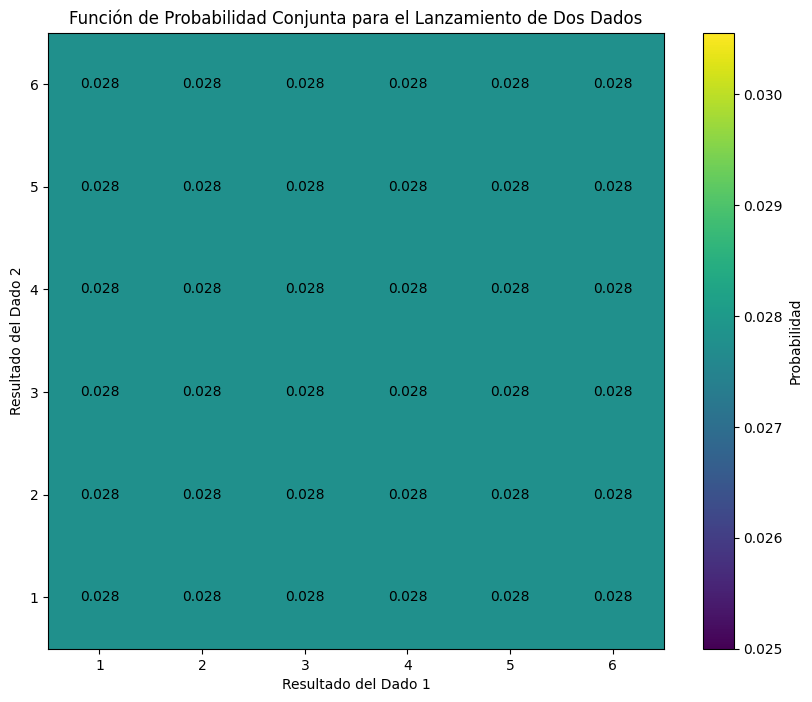

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función de probabilidad conjunta
def prob_conjunta(x, y):
    if 1 <= x <= 6 and 1 <= y <= 6:
        return 1/36
    else:
        return 0

# Creamos una matriz con las probabilidades
x_values = np.arange(1, 7)
y_values = np.arange(1, 7)
probabilidades = np.array([[prob_conjunta(x, y) for y in y_values] for x in x_values])

# Visualizamos la función de probabilidad conjunta
plt.figure(figsize=(10, 8))
plt.imshow(probabilidades, cmap='viridis', origin='lower', extent=[0.5, 6.5, 0.5, 6.5])
plt.colorbar(label='Probabilidad')
plt.xlabel('Resultado del Dado 1')
plt.ylabel('Resultado del Dado 2')
plt.title('Función de Probabilidad Conjunta para el Lanzamiento de Dos Dados')
for i in range(6):
    for j in range(6):
        plt.text(i+1, j+1, f'{probabilidades[i,j]:.3f}', ha='center', va='center')
plt.show()

- Este código crea un mapa de calor donde cada celda representa la probabilidad de una combinación específica de resultados de los dos dados. Observen cómo todas las celdas tienen el mismo color, indicando que todas las combinaciones son igualmente probables (1/36).

In [3]:
import pandas as pd
from fractions import Fraction

# Definición de los valores de los dados
dados = [1, 2, 3, 4, 5, 6]

# Inicializar una tabla de probabilidades con ceros (en formato Fraction)
tabla_prob = [[Fraction(0) for _ in range(11)] for _ in range(6)]

# Calcular las probabilidades para cada combinación de los dados
for b in dados:
    for n in dados:
        S = b + n  # Suma de los resultados
        D = abs(b - n)  # Valor absoluto de la diferencia de los resultados
        tabla_prob[D][S - 2] += Fraction(1, 36)  # Se resta 2 para indexar desde 0

# Crear un DataFrame para representar la tabla de probabilidades
columnas = ['S = 2', 'S = 3', 'S = 4', 'S = 5', 'S = 6', 'S = 7',
            'S = 8', 'S = 9', 'S = 10', 'S = 11', 'S = 12']
indices = ['D = 0', 'D = 1', 'D = 2', 'D = 3', 'D = 4', 'D = 5']

df_prob = pd.DataFrame(tabla_prob, index=indices, columns=columnas)

# Mostrar la tabla con las probabilidades en formato de fracción
print(df_prob)

# Calcular el valor total para verificar que la suma de probabilidades es 1
suma_probabilidades = sum(sum(fila) for fila in tabla_prob)
print("\nSuma total de las probabilidades: ", suma_probabilidades)



      S = 2 S = 3 S = 4 S = 5 S = 6 S = 7 S = 8 S = 9 S = 10 S = 11 S = 12
D = 0  1/36     0  1/36     0  1/36     0  1/36     0   1/36      0   1/36
D = 1     0  1/18     0  1/18     0  1/18     0  1/18      0   1/18      0
D = 2     0     0  1/18     0  1/18     0  1/18     0   1/18      0      0
D = 3     0     0     0  1/18     0  1/18     0  1/18      0      0      0
D = 4     0     0     0     0  1/18     0  1/18     0      0      0      0
D = 5     0     0     0     0     0  1/18     0     0      0      0      0

Suma total de las probabilidades:  1


In [4]:
import pandas as pd
from fractions import Fraction

def calcular_columna_s(dados, s_valor):
    # Inicializar una lista para almacenar los pasos del cálculo
    pasos = []

    # Inicializar la columna de probabilidades con ceros (en formato Fraction)
    columna_prob = [Fraction(0) for _ in range(6)]

    # Calcular las probabilidades para cada combinación de los dados
    for b in dados:
        for n in dados:
            S = b + n  # Suma de los resultados
            if S == s_valor:
                D = abs(b - n)  # Valor absoluto de la diferencia de los resultados
                columna_prob[D] += Fraction(1, 36)
                pasos.append(f"Para b = {b} y n = {n}: S = {b} + {n} = {S}, D = |{b} - {n}| = {D}, Prob = 1/36")

    return columna_prob, pasos

# Definición de los valores de los dados
dados = [1, 2, 3, 4, 5, 6]
s_valor = 4  # Parámetro que define la columna a calcular

# Calcular la columna y los pasos
columna_prob, pasos = calcular_columna_s(dados, s_valor)

# Crear un DataFrame para representar la columna de probabilidades
indices = ['D = 0', 'D = 1', 'D = 2', 'D = 3', 'D = 4', 'D = 5']
df_columna_prob = pd.DataFrame({f'S = {s_valor}': columna_prob}, index=indices)

# Mostrar la columna de probabilidades en formato de fracción
print(df_columna_prob)

# Mostrar los pasos de cálculo
print("\nDesarrollo paso a paso:")
for paso in pasos:
    print(paso)

# Verificar la suma de las probabilidades de la columna
suma_probabilidades = sum(columna_prob)
print("\nSuma total de las probabilidades para S =", s_valor, ": ", suma_probabilidades)


      S = 4
D = 0  1/36
D = 1     0
D = 2  1/18
D = 3     0
D = 4     0
D = 5     0

Desarrollo paso a paso:
Para b = 1 y n = 3: S = 1 + 3 = 4, D = |1 - 3| = 2, Prob = 1/36
Para b = 2 y n = 2: S = 2 + 2 = 4, D = |2 - 2| = 0, Prob = 1/36
Para b = 3 y n = 1: S = 3 + 1 = 4, D = |3 - 1| = 2, Prob = 1/36

Suma total de las probabilidades para S = 4 :  1/12




Las funciones de probabilidad conjunta son una herramienta estadística esencial cuando se desea comprender la relación entre dos o más variables aleatorias. Estas funciones permiten calcular la probabilidad de que ocurra una combinación específica de eventos simultáneamente, capturando las posibles interdependencias entre las variables involucradas.

### Ejemplo Estadístico: Análisis de un Servidor Web

Supongamos que administramos un servidor web y estamos interesados en estudiar la relación entre dos variables clave: el número de visitas a la página principal ($ X $) y el número de compras realizadas ($ Y $). Queremos calcular la probabilidad de que un determinado número de visitas resulte en un determinado número de compras. Esta probabilidad conjunta se denota como $ P(X = x, Y = y) $, donde $ X $ e $ Y $ son variables aleatorias discretas que representan, respectivamente, las visitas y las compras.

#### 1. **Definición de la Función de Probabilidad Conjunta**:
   - La función de probabilidad conjunta $ P(X = x, Y = y) $ nos proporciona la probabilidad de que ocurran simultáneamente los eventos $ X = x $ y $ Y = y $. Matemáticamente, se define para variables discretas como:
   $
   P(X = x, Y = y)
   $
   Esta función no solo cuantifica la probabilidad de cada posible combinación de valores de $ X $ y $ Y $, sino que también refleja cualquier posible dependencia entre estas variables.

#### 2. **Estimación a partir de Datos**:
   - En un contexto práctico, si tenemos un conjunto de datos históricos sobre las visitas y las compras en el servidor web, podemos estimar $ P(X = x, Y = y) $ utilizando frecuencias relativas. Por ejemplo, si en una muestra de 1000 observaciones, encontramos que 50 veces hubo 100 visitas y 10 compras, podemos estimar la probabilidad conjunta como:
   $
   \hat{P}(X = 100, Y = 10) = \frac{50}{1000} = 0.05
   $
   Esta estimación nos indica que, en nuestro conjunto de datos, la combinación de 100 visitas y 10 compras ocurrió el 5% de las veces.

#### 3. **Interpretación Estadística**:
   - Si $ X $ e $ Y $ fueran variables independientes, la probabilidad conjunta se podría descomponer como el producto de las probabilidades marginales:
   $
   P(X = x, Y = y) = P(X = x) \times P(Y = y)
   $
   Sin embargo, en muchos casos, las variables $ X $ e $ Y $ no son independientes, y la función de probabilidad conjunta captura esta dependencia. La comparación entre $ P(X = x, Y = y) $ y $ P(X = x) \times P(Y = y) $ puede revelar la existencia y el grado de dependencia entre las variables.

#### 4. **Aplicación en Análisis Estadístico**:
   - La función de probabilidad conjunta es fundamental para varios análisis estadísticos, como el cálculo de la esperanza matemática conjunta, la covarianza, y la correlación entre variables. Por ejemplo, la covarianza entre $ X $ e $ Y $ se puede calcular a partir de la función de probabilidad conjunta:
   $
   \text{Cov}(X, Y) = E[(X - \mu_X)(Y - \mu_Y)] = \sum_{x}\sum_{y} (x - \mu_X)(y - \mu_Y)P(X = x, Y = y)
   $
   donde $ \mu_X $ y $ \mu_Y $ son las esperanzas matemáticas de $ X $ e $ Y $, respectivamente.

   - **Covarianza**: En este contexto, la covarianza es una medida que indica cómo varían conjuntamente las dos variables $ X $ e $ Y $. Si la covarianza es positiva, significa que un aumento en el número de visitas $ X $ tiende a estar asociado con un aumento en el número de compras $ Y $. Si es negativa, sugiere lo contrario: un aumento en $ X $ tiende a estar asociado con una disminución en $ Y $. Una covarianza cercana a cero indicaría que no hay una relación lineal clara entre las dos variables.

#### 5. **Beneficios Estadísticos**:
   - El uso de la función de probabilidad conjunta permite realizar análisis estadísticos más precisos y reveladores, como la identificación de patrones y tendencias en los datos que no serían evidentes al considerar cada variable por separado. Además, facilita la construcción de modelos predictivos y de inferencia, que pueden ser utilizados para optimizar estrategias basadas en la probabilidad de ocurrencia de eventos conjuntos.



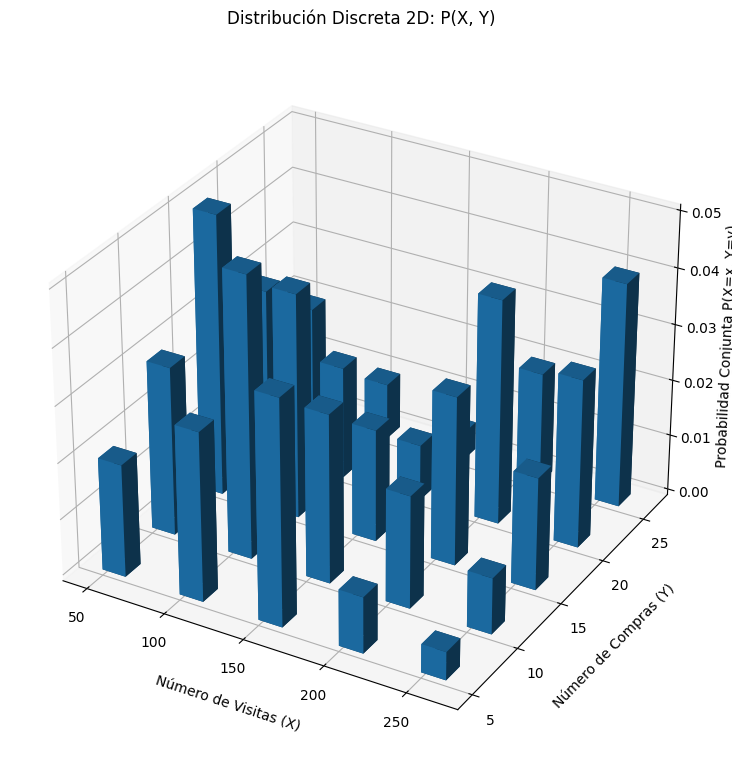

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar datos simulados para X (visitas) y Y (compras)
visitas = np.array([50, 100, 150, 200, 250])
compras = np.array([5, 10, 15, 20, 25])

# Simular la función de probabilidad conjunta P(X = x, Y = y)
# Aquí creamos un patrón donde, por ejemplo, 150 visitas puede tener más ventas que 250 visitas.
P_XY = np.array([[0.02, 0.03, 0.04, 0.01, 0.005],
                 [0.03, 0.05, 0.03, 0.02, 0.01],
                 [0.05, 0.04, 0.02, 0.03, 0.02],
                 [0.03, 0.02, 0.01, 0.04, 0.03],
                 [0.02, 0.01, 0.005, 0.02, 0.04]])

# Crear un grid de valores para X e Y
X, Y = np.meshgrid(visitas, compras)

# Crear la gráfica 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear la gráfica de barras en 3D
ax.bar3d(X.flatten(), Y.flatten(), np.zeros_like(X.flatten()), 15, 1.5, P_XY.flatten(), shade=True)

# Configurar etiquetas y título
ax.set_xlabel('Número de Visitas (X)', labelpad=10)
ax.set_ylabel('Número de Compras (Y)', labelpad=10)
ax.set_zlabel('Probabilidad Conjunta P(X=x, Y=y)', labelpad=3)
ax.set_title('Distribución Discreta 2D: P(X, Y)', pad=20)

# Ajustar la visualización para que no se corte ningún texto
plt.tight_layout(pad=2.0)
plt.show()



El escenario en el que un mayor número de visitas no siempre se traduce en un mayor número de ventas puede deberse a varios factores hipotéticos. Aquí te presento algunas posibles explicaciones:

1. **Calidad del Tráfico**:
   - **Tráfico No Cualificado**: Un aumento en el número de visitas podría estar relacionado con una campaña publicitaria o de marketing que atrae a muchas personas, pero que no están realmente interesadas en realizar una compra. Por ejemplo, una promoción que genera curiosidad pero que no está dirigida específicamente a clientes potenciales.
   - **Tráfico Relevante vs. Tráfico No Relevante**: Es posible que las visitas adicionales provengan de usuarios que no son parte del público objetivo, lo que significa que aunque las visitas aumentan, la tasa de conversión a compras no lo hace.

2. **Saturación del Producto**:
   - **Oferta Saturada**: Si el producto o servicio ofrecido ya ha alcanzado su máxima penetración en el mercado, más visitas pueden no generar más ventas porque la mayoría de los usuarios interesados ya han realizado una compra o están esperando nuevas ofertas.
   - **Falta de Innovación**: Si los productos o servicios no se actualizan o innovan, los usuarios recurrentes podrían perder interés, lo que significa que aunque vuelvan a visitar el sitio, no encontrarán nada nuevo que comprar.

3. **Problemas de Usabilidad o Experiencia del Usuario**:
   - **Problemas en la Experiencia de Usuario (UX)**: Un aumento en las visitas puede poner de relieve problemas en la usabilidad del sitio web, como tiempos de carga lentos, procesos de compra complicados o errores en la página, lo que desincentiva a los usuarios de completar la compra.
   - **Diseño Poco Atractivo o Confuso**: Si el diseño del sitio web no es intuitivo o atractivo, los usuarios pueden abandonar el sitio antes de realizar una compra, lo que afecta negativamente las conversiones a pesar de un alto número de visitas.

4. **Competencia y Comparación de Precios**:
   - **Competencia**: Los usuarios pueden visitar el sitio web para comparar precios o características con otros proveedores, lo que significa que aunque las visitas aumentan, los usuarios terminan comprando en otro lugar.
   - **Promociones en Otros Sitios**: Un incremento en las visitas podría estar relacionado con comparaciones de precios debido a promociones en sitios competidores, lo que podría llevar a que los usuarios visiten, pero no compren en tu sitio.

5. **Cambio en el Comportamiento del Usuario**:
   - **Cambio en las Preferencias del Cliente**: Los usuarios pueden estar explorando más opciones antes de tomar una decisión de compra, lo que lleva a más visitas pero no necesariamente a más compras.
   - **Investigación y Planificación**: Los usuarios pueden estar en la fase de investigación o planificación, visitando varias veces antes de tomar la decisión de compra, lo que hace que el aumento en visitas no se refleje inmediatamente en las ventas.

6. **Estrategia de Marketing Inadecuada**:
   - **Mensaje Inadecuado**: Si la campaña de marketing que generó el aumento en visitas no está alineada con las expectativas de los usuarios, puede que estos lleguen al sitio web y se den cuenta de que no es lo que buscaban, resultando en pocas conversiones.
   - **Promociones Desenfocadas**: Ofertas o promociones que atraen visitas, pero que no son lo suficientemente atractivas o relevantes para convertir esas visitas en ventas.

Estas son algunas razones hipotéticas por las que un mayor número de visitas no siempre implica un mayor número de ventas. Cada uno de estos factores podría estar influyendo en la dinámica de conversión y sería importante analizar el contexto específico para identificar las causas reales en un caso concreto.


## Funciones de Probabilidad Conjunta
  
- **Variables Continuas:**
  Para variables aleatorias continuas, utilizamos lo que se llama función de densidad de probabilidad conjunta, que se denota como $f(x, y)$. A diferencia de las variables discretas, aquí no hablamos de la probabilidad de valores específicos (que sería cero para variables continuas), sino de la densidad de probabilidad en un punto $(x, y)$.
  
  **Ejemplo: Fallo en un chip**
  
  Supongamos que estamos analizando fallos en chips de computadora. Definimos dos variables aleatorias continuas:
  
  - X: la coordenada horizontal del fallo en el chip (en milímetros)
  - Y: la coordenada vertical del fallo en el chip (en milímetros)
  
  La función $f(x, y)$ nos daría la densidad de probabilidad de que un fallo ocurra en la coordenada $(x, y)$ del chip.
  
  Por ejemplo, una posible función de densidad conjunta podría ser:
  
  $f(x, y) = \frac{1}{2\pi\sigma_x\sigma_y} \exp\left(-\frac{1}{2}\left(\frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2}\right)\right)$
  
  Esta es la función de densidad de una distribución normal bivariada, donde $\mu_x$ y $\mu_y$ son las medias de X e Y respectivamente, y $\sigma_x$ y $\sigma_y$ son sus desviaciones estándar.
  
  Visualicemos esta función:

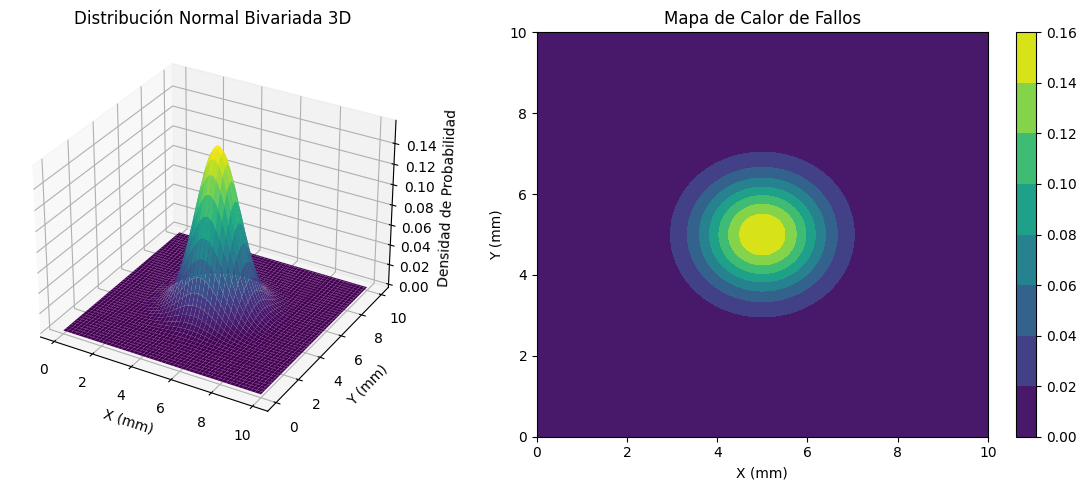

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return (1 / (2 * np.pi * sigma_x * sigma_y) *
            np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) +
                     (y - mu_y)**2 / (2 * sigma_y**2))))

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Parámetros de ejemplo
mu_x, mu_y = 5, 5
sigma_x, sigma_y = 1, 1

Z = f(X, Y, mu_x, mu_y, sigma_x, sigma_y)

fig = plt.figure(figsize=(12, 5))

# Gráfico 3D
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Densidad de Probabilidad')
ax.set_title('Distribución Normal Bivariada 3D')

# Gráfico de contorno
ax = fig.add_subplot(122)
contour = ax.contourf(X, Y, Z, cmap='viridis')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_title('Mapa de Calor de Fallos')
plt.colorbar(contour)

plt.tight_layout()
plt.show()

1. Este gráfico muestra la densidad de probabilidad en cada punto del chip. Las áreas más altas (más amarillas) indican zonas donde es más probable que ocurra un fallo.
  

Es importante notar que para las funciones de probabilidad conjunta, ya sean discretas o continuas, siempre se debe cumplir que la suma (o integral) de todas las probabilidades sea igual a 1:

Para variables discretas: $\sum_{x}\sum_{y} P(X=x, Y=y) = 1$

Para variables continuas: $\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(x,y) \, dx \, dy = 1$

Estas funciones de probabilidad conjunta son fundamentales para entender cómo se relacionan múltiples variables aleatorias y son la base para muchos análisis más avanzados en probabilidad y estadística.

---

### Ejemplos Comunes de Funciones de Densidad Conjunta

Las funciones de densidad conjunta son fundamentales en estadística para modelar la relación entre dos o más variables continuas. Aquí algunos ejemplos bien conocidos:

1. **Distribución Normal Bivariada**:
   - **Aplicación**: Muy utilizada en finanzas y ciencias naturales, esta distribución modela la relación entre dos variables que siguen una distribución normal, pero que pueden estar correlacionadas, como la altura y el peso de personas en una población.
   - **Intuición**: Permite capturar no solo la variabilidad de cada variable por separado, sino también cómo estas se comportan conjuntamente, es decir, si un aumento en una variable tiende a estar acompañado de un aumento o disminución en la otra.

2. **Distribución de Pareto Conjunta**:
   - **Aplicación**: Común en análisis de riesgo y economía, donde se modelan fenómenos con "colas gruesas", como la distribución de riquezas o la magnitud de desastres naturales.
   - **Intuición**: Se utiliza para describir situaciones en las que dos variables, como ingresos y patrimonio, tienen una alta probabilidad de valores extremos, y donde la ocurrencia de un valor extremo en una variable puede implicar la probabilidad de un valor extremo en la otra.

3. **Distribución Uniforme Conjunta**:
   - **Aplicación**: Se emplea en simulaciones y algoritmos que requieren la generación de valores aleatorios dentro de un área específica, como en el diseño de experimentos o la simulación de distribuciones de recursos.
   - **Intuición**: Esta distribución asigna la misma probabilidad de ocurrencia a todas las combinaciones posibles de valores dentro de un rango definido, reflejando un escenario donde no hay preferencia alguna hacia ninguna combinación de valores.

4. **Distribución Exponencial Conjunta**:
   - **Aplicación**: Frecuente en ingeniería y ciencias de la computación, especialmente en la modelización del tiempo hasta que ocurren dos eventos dependientes, como el tiempo de vida de dos componentes interconectados.
   - **Intuición**: Se utiliza para modelar la probabilidad conjunta de que dos eventos ocurran en un cierto lapso de tiempo, especialmente cuando estos eventos están relacionados, como la falla de dos partes de un sistema.

Estos ejemplos reflejan cómo las funciones de densidad conjunta se aplican a diversas disciplinas para modelar fenómenos donde las variables no son independientes y donde su relación es crucial para una comprensión profunda del comportamiento del sistema.

---

## Funciones de Probabilidad Marginal

Ahora que hemos explorado las funciones de probabilidad conjunta, es momento de introducirnos en el concepto de funciones de probabilidad marginal. Las funciones marginales son una herramienta que nos permite examinar el comportamiento de una variable aleatoria individual dentro de un sistema multivariable.

En esencia, una función marginal nos dice la probabilidad de una sola variable sin tener en cuenta las demás. Es como si estuviéramos "marginando" o "dejando de lado" las otras variables para enfocarnos en una en particular.

Veamos cómo se definen y calculan estas funciones marginales:

1. **Para variables discretas:**
  
  La función de probabilidad marginal para una variable discreta X se obtiene sumando las probabilidades conjuntas sobre todos los posibles valores de la otra variable (o variables). Matemáticamente, lo expresamos así:
  
  $P(X=x) = \sum_{y} P(X=x, Y=y)$
  
  De manera similar, para Y:
  
  $P(Y=y) = \sum_{x} P(X=x, Y=y)$
  
  **Ejemplo: Volvamos a nuestro lanzamiento de dos dados**
  
  Supongamos que queremos saber la probabilidad marginal de obtener un 3 en el primer dado, sin importar qué salga en el segundo. Calcularíamos:
  
  $P(X=3) = P(X=3, Y=1) + P(X=3, Y=2) + P(X=3, Y=3) + P(X=3, Y=4) + P(X=3, Y=5) + P(X=3, Y=6)$
  
  $P(X=3) = \frac{1}{36} + \frac{1}{36} + \frac{1}{36} + \frac{1}{36} + \frac{1}{36} + \frac{1}{36} = \frac{6}{36} = \frac{1}{6}$
  
  Esto tiene sentido intuitivamente: la probabilidad de obtener un 3 en un solo dado es 1/6.
  
  Visualicemos esto con Python:

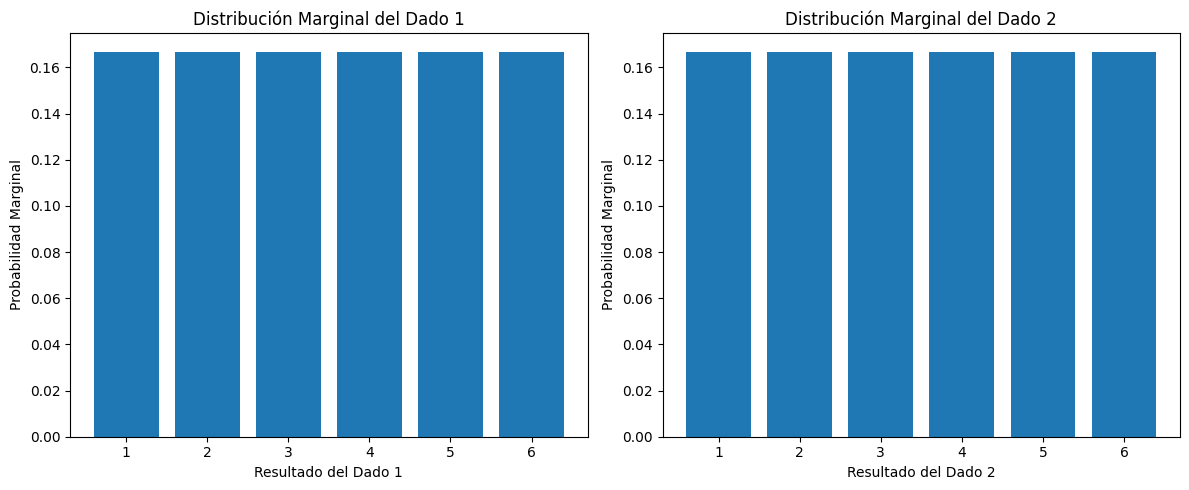

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Usamos la misma función de probabilidad conjunta que antes
def prob_conjunta(x, y):
    if 1 <= x <= 6 and 1 <= y <= 6:
        return 1/36
    else:
        return 0

# Creamos la matriz de probabilidades conjuntas
x_values = np.arange(1, 7)
y_values = np.arange(1, 7)
probabilidades = np.array([[prob_conjunta(x, y) for y in y_values] for x in x_values])

# Calculamos las marginales
marginal_x = np.sum(probabilidades, axis=1)
marginal_y = np.sum(probabilidades, axis=0)

# Visualizamos las marginales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(x_values, marginal_x)
ax1.set_xlabel('Resultado del Dado 1')
ax1.set_ylabel('Probabilidad Marginal')
ax1.set_title('Distribución Marginal del Dado 1')

ax2.bar(y_values, marginal_y)
ax2.set_xlabel('Resultado del Dado 2')
ax2.set_ylabel('Probabilidad Marginal')
ax2.set_title('Distribución Marginal del Dado 2')

plt.tight_layout()
plt.show()

Este código generará dos gráficos de barras, uno para cada dado, mostrando las probabilidades marginales de cada resultado. Observarán que cada barra tiene una altura de 1/6, lo que confirma nuestra intuición sobre la probabilidad de cada resultado en un dado justo.

**Para variables continuas:**

En el caso de variables aleatorias continuas, la función de densidad marginal se obtiene integrando la función de densidad conjunta sobre todas las posibles valores de la otra variable. Matemáticamente:

$f_X(x) = \int_{-\infty}^{\infty} f(x,y) \, dy$

$f_Y(y) = \int_{-\infty}^{\infty} f(x,y) \, dx$

**Ejemplo: Volvamos al caso del fallo en el chip**

Supongamos que queremos conocer la densidad marginal de fallos a lo largo del eje X, sin importar su posición en Y. Utilizando la función de densidad conjunta que definimos anteriormente (distribución normal bivariada), la densidad marginal de X sería:

$f_X(x) = \frac{1}{\sqrt{2\pi\sigma_x^2}} \exp\left(-\frac{(x-\mu_x)^2}{2\sigma_x^2}\right)$

Esto resulta en una distribución normal univariada para X.

Visualicemos esto:

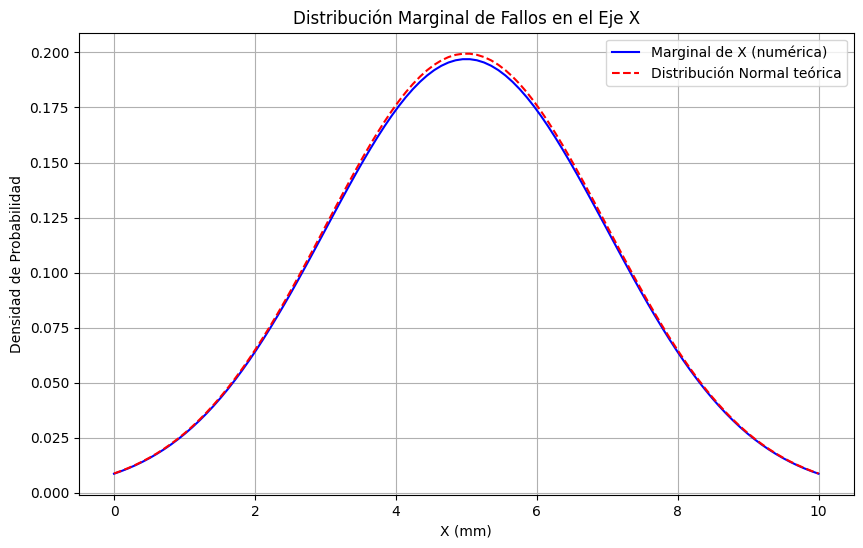

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def f(x, y, mu_x=5, mu_y=5, sigma_x=2, sigma_y=2):
    return (1/(2*np.pi*sigma_x*sigma_y) *
            np.exp(-((x-mu_x)**2/(2*sigma_x**2) + (y-mu_y)**2/(2*sigma_y**2))))

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Calculamos la marginal de X
marginal_x = np.trapz(f(X, Y), y, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(x, marginal_x, 'b-', label='Marginal de X (numérica)')
plt.plot(x, norm.pdf(x, loc=5, scale=2), 'r--', label='Distribución Normal teórica')
plt.xlabel('X (mm)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Marginal de Fallos en el Eje X')
plt.legend()
plt.grid(True)
plt.show()

2. Este gráfico muestra la densidad marginal de fallos a lo largo del eje X. La línea azul es el resultado de nuestra integración numérica, mientras que la línea roja punteada es la distribución normal teórica. Observen cómo coinciden, confirmando que la marginal de una distribución normal bivariada es una distribución normal univariada.
  

Las funciones marginales son extremadamente útiles en la práctica. Nos permiten:

1. Simplificar el análisis de sistemas complejos al enfocarnos en una variable a la vez.
2. Comparar el comportamiento individual de variables en un sistema multivariable.
3. Identificar dependencias o independencias entre variables.

---

Claro, aquí tienes una versión mejorada del desarrollo del tema:

---

## Esperanza Matemática en el Caso Multivariable

Tras haber explorado las funciones conjuntas y marginales, estamos listos para abordar el concepto de esperanza matemática en un contexto multivariable. La esperanza matemática, o valor esperado, es una medida central que proporciona una estimación del "promedio" o comportamiento típico de una variable aleatoria.

Cuando trabajamos con múltiples variables aleatorias, es posible calcular la esperanza de una función que depende de estas variables. Esto es particularmente útil cuando queremos entender cómo una característica de un sistema, que depende de varias variables aleatorias, tiende a comportarse en promedio.

Matemáticamente, para una función $g(X, Y)$ de dos variables aleatorias $X$ e $Y$, la esperanza matemática se define de la siguiente manera:

1. **Para variables discretas:**

   $
   E[g(X,Y)] = \sum_{x} \sum_{y} g(x,y)P(X=x,Y=y)
   $

2. **Para variables continuas:**

   $
   E[g(X,Y)] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} g(x,y)f(x,y) \, dx \, dy
   $

Un caso especial de gran relevancia es el vector de medias $\mu = (E[X], E[Y])$, el cual proporciona los valores esperados de cada variable aleatoria por separado. Este vector es fundamental en muchas distribuciones multivariadas, como la distribución normal multivariante.
